In [63]:
import numpy as np
import cv2

# variables that you can adjust
driveName = r"\\.\PhysicalDrive1"  # Change this to the correct drive
sectorSize = 512    # The number of bytes in a sector (two hexidecimal numbers is 8 bits, or a byte)
startingSector = 2097152
frameWidth = 384    # The number of pixels in the width (Each pixel is a byte)
frameHeight = 296    # The number of pixels in the height
# numSecRecorded = 150
# fps = 20
numFrames2Read = 1550 #17805 # 15 mins. a little less than fps * numSecRecorded.. #1900

f = open(driveName, "rb")  # Open drive
f.seek(startingSector * sectorSize)  # Move to correct sector
writer = cv2.VideoWriter("output.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 20, (frameWidth, frameHeight))

# Debug Variables on the Frame Footer
frameList = [] # 1. Each frame's number
intFrameTimes = [] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = [] # 3. The number of lines in each frame
frameDMA = [] # 4. Was DMA transfer completed?
mainFrameTimes = [] # 6. When the frame begins to be written to the SD card
EWLVoltage = [] # 5. EWL Voltage level
mainFullBuffs = [] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = [] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

frameArray = []

for numFrame in range(numFrames2Read):  # Loop through frames
    rawBytes = f.read(frameWidth * frameHeight)
    pixelValues = list(rawBytes)  # Converts from bytes to list. This and the next line can be done more efficiently
    

    frameNumberAr = pixelValues[-4:]
    frameNumber = frameNumberAr[0] + pow(16, 2) * frameNumberAr[1] + pow(16, 4) * frameNumberAr[2] + pow(16, 6) * frameNumberAr[3]   
    intTimestampAr = pixelValues[-8:-4]
    intTimestamp = intTimestampAr[0] + pow(16, 2) * intTimestampAr[1] + pow(16, 4) * intTimestampAr[2] + pow(16, 6) * intTimestampAr[3]
    lineCountAr = pixelValues[-12:-8]
    lineCount = lineCountAr[0] + pow(16, 2) * lineCountAr[1] + pow(16, 4) * lineCountAr[2] + pow(16, 6) * lineCountAr[3]   
    mainTimestampAr = pixelValues[-24:-20]
    mainTimestamp = mainTimestampAr[0] + pow(16, 2) * mainTimestampAr[1] + pow(16, 4) * mainTimestampAr[2] + pow(16, 6) * mainTimestampAr[3]
    voltageStepAr = pixelValues[-20:-16]
    voltageStep = voltageStepAr[0] + pow(16, 2) * voltageStepAr[1] + pow(16, 4) * voltageStepAr[2] + pow(16, 6) * voltageStepAr[3]
    

    frame = np.array(pixelValues)  # Convert to numpy array
    frame = np.reshape(frame, (frameHeight, frameWidth))  # reshape into correct frame dimensions
    
    # cv2.imshow("sdCard Video", frame / 255.0)  # Display frame
    # cv2.waitKey(0)  # Wait for button press to show next frame. Can use time.sleep(n) to increment frame every 'n' seconds
    # print(rawBytes.hex())

    # This chunk is just used to get things actually working. The proper way is to figure out how to write grayscale images to avi files
    tempFrame = np.zeros((frameHeight, frameWidth, 3))
    tempFrame[:, :, 0] = frame
    tempFrame[:, :, 1] = frame
    tempFrame[:, :, 2] = frame
    writer.write(tempFrame.astype("uint8"))
    
    frameList.append(frameNumber) #1
    intFrameTimes.append(intTimestamp) #2
    frameLines.append(lineCount) #3
    frameDMA.append(pixelValues[-16]) #4
    EWLVoltage.append(voltageStep) #5
    mainFrameTimes.append(mainTimestamp) #6
    mainFullBuffs.append(pixelValues[-28]) #7
    intFullBuffs.append(pixelValues[-32]) #8
    
    print("Frame Number: ", frameNumber, "\t", 
          "Interrupt Timestamp: ", intTimestamp, "\t", 
          "Main Timestamp: ", mainTimestamp, "\t",
          "EWL Voltage: ", voltageStep, "\t",
#          "Main Buffers Ahead: ", pixelValues[-28], "\t",
#          "Interrupt Buffers Ahead: ", pixelValues[-32], "\t",
          "\n")
    
    frameArray.append(frame)
f.close()
writer.release()

Frame Number:  0 	 Interrupt Timestamp:  78 	 Main Timestamp:  78 	 EWL Voltage:  226 	 

Frame Number:  1 	 Interrupt Timestamp:  129 	 Main Timestamp:  129 	 EWL Voltage:  226 	 

Frame Number:  2 	 Interrupt Timestamp:  179 	 Main Timestamp:  179 	 EWL Voltage:  226 	 

Frame Number:  3 	 Interrupt Timestamp:  230 	 Main Timestamp:  230 	 EWL Voltage:  226 	 

Frame Number:  4 	 Interrupt Timestamp:  280 	 Main Timestamp:  280 	 EWL Voltage:  226 	 

Frame Number:  5 	 Interrupt Timestamp:  331 	 Main Timestamp:  331 	 EWL Voltage:  226 	 

Frame Number:  6 	 Interrupt Timestamp:  381 	 Main Timestamp:  381 	 EWL Voltage:  226 	 

Frame Number:  7 	 Interrupt Timestamp:  431 	 Main Timestamp:  431 	 EWL Voltage:  226 	 

Frame Number:  8 	 Interrupt Timestamp:  482 	 Main Timestamp:  482 	 EWL Voltage:  226 	 

Frame Number:  9 	 Interrupt Timestamp:  532 	 Main Timestamp:  532 	 EWL Voltage:  226 	 

Frame Number:  10 	 Interrupt Timestamp:  583 	 Main Timestamp:  583 	 EWL Voltage

Frame Number:  94 	 Interrupt Timestamp:  4820 	 Main Timestamp:  4820 	 EWL Voltage:  226 	 

Frame Number:  95 	 Interrupt Timestamp:  4870 	 Main Timestamp:  4870 	 EWL Voltage:  226 	 

Frame Number:  96 	 Interrupt Timestamp:  4921 	 Main Timestamp:  4921 	 EWL Voltage:  226 	 

Frame Number:  97 	 Interrupt Timestamp:  4971 	 Main Timestamp:  4971 	 EWL Voltage:  226 	 

Frame Number:  98 	 Interrupt Timestamp:  5022 	 Main Timestamp:  5022 	 EWL Voltage:  226 	 

Frame Number:  99 	 Interrupt Timestamp:  5072 	 Main Timestamp:  5072 	 EWL Voltage:  226 	 

Frame Number:  100 	 Interrupt Timestamp:  5122 	 Main Timestamp:  5122 	 EWL Voltage:  226 	 

Frame Number:  101 	 Interrupt Timestamp:  5173 	 Main Timestamp:  5173 	 EWL Voltage:  226 	 

Frame Number:  102 	 Interrupt Timestamp:  5223 	 Main Timestamp:  5223 	 EWL Voltage:  226 	 

Frame Number:  103 	 Interrupt Timestamp:  5274 	 Main Timestamp:  5274 	 EWL Voltage:  226 	 

Frame Number:  104 	 Interrupt Timestamp:  532

Frame Number:  180 	 Interrupt Timestamp:  9158 	 Main Timestamp:  9158 	 EWL Voltage:  226 	 

Frame Number:  181 	 Interrupt Timestamp:  9208 	 Main Timestamp:  9208 	 EWL Voltage:  226 	 

Frame Number:  182 	 Interrupt Timestamp:  9259 	 Main Timestamp:  9259 	 EWL Voltage:  226 	 

Frame Number:  183 	 Interrupt Timestamp:  9309 	 Main Timestamp:  9309 	 EWL Voltage:  226 	 

Frame Number:  184 	 Interrupt Timestamp:  9359 	 Main Timestamp:  9360 	 EWL Voltage:  226 	 

Frame Number:  185 	 Interrupt Timestamp:  9410 	 Main Timestamp:  9410 	 EWL Voltage:  226 	 

Frame Number:  186 	 Interrupt Timestamp:  9460 	 Main Timestamp:  9460 	 EWL Voltage:  226 	 

Frame Number:  187 	 Interrupt Timestamp:  9511 	 Main Timestamp:  9511 	 EWL Voltage:  226 	 

Frame Number:  188 	 Interrupt Timestamp:  9561 	 Main Timestamp:  9561 	 EWL Voltage:  226 	 

Frame Number:  189 	 Interrupt Timestamp:  9612 	 Main Timestamp:  9612 	 EWL Voltage:  226 	 

Frame Number:  190 	 Interrupt Timestamp

Frame Number:  267 	 Interrupt Timestamp:  13546 	 Main Timestamp:  13546 	 EWL Voltage:  226 	 

Frame Number:  268 	 Interrupt Timestamp:  13597 	 Main Timestamp:  13597 	 EWL Voltage:  226 	 

Frame Number:  269 	 Interrupt Timestamp:  13647 	 Main Timestamp:  13647 	 EWL Voltage:  226 	 

Frame Number:  270 	 Interrupt Timestamp:  13697 	 Main Timestamp:  13697 	 EWL Voltage:  226 	 

Frame Number:  271 	 Interrupt Timestamp:  13748 	 Main Timestamp:  13748 	 EWL Voltage:  226 	 

Frame Number:  272 	 Interrupt Timestamp:  13798 	 Main Timestamp:  13798 	 EWL Voltage:  226 	 

Frame Number:  273 	 Interrupt Timestamp:  13849 	 Main Timestamp:  13849 	 EWL Voltage:  226 	 

Frame Number:  274 	 Interrupt Timestamp:  13899 	 Main Timestamp:  13899 	 EWL Voltage:  226 	 

Frame Number:  275 	 Interrupt Timestamp:  13950 	 Main Timestamp:  13950 	 EWL Voltage:  226 	 

Frame Number:  276 	 Interrupt Timestamp:  14000 	 Main Timestamp:  14000 	 EWL Voltage:  226 	 

Frame Number:  277 	

Frame Number:  353 	 Interrupt Timestamp:  17884 	 Main Timestamp:  17884 	 EWL Voltage:  226 	 

Frame Number:  354 	 Interrupt Timestamp:  17935 	 Main Timestamp:  17935 	 EWL Voltage:  226 	 

Frame Number:  355 	 Interrupt Timestamp:  17985 	 Main Timestamp:  17985 	 EWL Voltage:  226 	 

Frame Number:  356 	 Interrupt Timestamp:  18035 	 Main Timestamp:  18035 	 EWL Voltage:  226 	 

Frame Number:  357 	 Interrupt Timestamp:  18086 	 Main Timestamp:  18086 	 EWL Voltage:  226 	 

Frame Number:  358 	 Interrupt Timestamp:  18136 	 Main Timestamp:  18136 	 EWL Voltage:  226 	 

Frame Number:  359 	 Interrupt Timestamp:  18187 	 Main Timestamp:  18187 	 EWL Voltage:  226 	 

Frame Number:  360 	 Interrupt Timestamp:  18237 	 Main Timestamp:  18237 	 EWL Voltage:  226 	 

Frame Number:  361 	 Interrupt Timestamp:  18288 	 Main Timestamp:  18288 	 EWL Voltage:  226 	 

Frame Number:  362 	 Interrupt Timestamp:  18338 	 Main Timestamp:  18338 	 EWL Voltage:  226 	 

Frame Number:  363 	

Frame Number:  441 	 Interrupt Timestamp:  22323 	 Main Timestamp:  22323 	 EWL Voltage:  226 	 

Frame Number:  442 	 Interrupt Timestamp:  22373 	 Main Timestamp:  22373 	 EWL Voltage:  226 	 

Frame Number:  443 	 Interrupt Timestamp:  22424 	 Main Timestamp:  22424 	 EWL Voltage:  226 	 

Frame Number:  444 	 Interrupt Timestamp:  22474 	 Main Timestamp:  22474 	 EWL Voltage:  226 	 

Frame Number:  445 	 Interrupt Timestamp:  22525 	 Main Timestamp:  22525 	 EWL Voltage:  226 	 

Frame Number:  446 	 Interrupt Timestamp:  22575 	 Main Timestamp:  22575 	 EWL Voltage:  226 	 

Frame Number:  447 	 Interrupt Timestamp:  22626 	 Main Timestamp:  22626 	 EWL Voltage:  226 	 

Frame Number:  448 	 Interrupt Timestamp:  22676 	 Main Timestamp:  22676 	 EWL Voltage:  226 	 

Frame Number:  449 	 Interrupt Timestamp:  22726 	 Main Timestamp:  22726 	 EWL Voltage:  226 	 

Frame Number:  450 	 Interrupt Timestamp:  22777 	 Main Timestamp:  22777 	 EWL Voltage:  226 	 

Frame Number:  451 	

Frame Number:  526 	 Interrupt Timestamp:  26610 	 Main Timestamp:  26610 	 EWL Voltage:  226 	 

Frame Number:  527 	 Interrupt Timestamp:  26661 	 Main Timestamp:  26661 	 EWL Voltage:  226 	 

Frame Number:  528 	 Interrupt Timestamp:  26711 	 Main Timestamp:  26711 	 EWL Voltage:  226 	 

Frame Number:  529 	 Interrupt Timestamp:  26762 	 Main Timestamp:  26762 	 EWL Voltage:  226 	 

Frame Number:  530 	 Interrupt Timestamp:  26812 	 Main Timestamp:  26812 	 EWL Voltage:  226 	 

Frame Number:  531 	 Interrupt Timestamp:  26863 	 Main Timestamp:  26863 	 EWL Voltage:  226 	 

Frame Number:  532 	 Interrupt Timestamp:  26913 	 Main Timestamp:  26913 	 EWL Voltage:  226 	 

Frame Number:  533 	 Interrupt Timestamp:  26964 	 Main Timestamp:  26964 	 EWL Voltage:  226 	 

Frame Number:  534 	 Interrupt Timestamp:  27014 	 Main Timestamp:  27014 	 EWL Voltage:  226 	 

Frame Number:  535 	 Interrupt Timestamp:  27064 	 Main Timestamp:  27064 	 EWL Voltage:  226 	 

Frame Number:  536 	

Frame Number:  615 	 Interrupt Timestamp:  31100 	 Main Timestamp:  31100 	 EWL Voltage:  226 	 

Frame Number:  616 	 Interrupt Timestamp:  31150 	 Main Timestamp:  31150 	 EWL Voltage:  226 	 

Frame Number:  617 	 Interrupt Timestamp:  31201 	 Main Timestamp:  31201 	 EWL Voltage:  226 	 

Frame Number:  618 	 Interrupt Timestamp:  31251 	 Main Timestamp:  31251 	 EWL Voltage:  226 	 

Frame Number:  619 	 Interrupt Timestamp:  31301 	 Main Timestamp:  31301 	 EWL Voltage:  226 	 

Frame Number:  620 	 Interrupt Timestamp:  31352 	 Main Timestamp:  31352 	 EWL Voltage:  226 	 

Frame Number:  621 	 Interrupt Timestamp:  31402 	 Main Timestamp:  31402 	 EWL Voltage:  226 	 

Frame Number:  622 	 Interrupt Timestamp:  31453 	 Main Timestamp:  31453 	 EWL Voltage:  226 	 

Frame Number:  623 	 Interrupt Timestamp:  31503 	 Main Timestamp:  31503 	 EWL Voltage:  226 	 

Frame Number:  624 	 Interrupt Timestamp:  31554 	 Main Timestamp:  31554 	 EWL Voltage:  226 	 

Frame Number:  625 	

Frame Number:  699 	 Interrupt Timestamp:  35337 	 Main Timestamp:  35337 	 EWL Voltage:  226 	 

Frame Number:  700 	 Interrupt Timestamp:  35387 	 Main Timestamp:  35387 	 EWL Voltage:  226 	 

Frame Number:  701 	 Interrupt Timestamp:  35438 	 Main Timestamp:  35438 	 EWL Voltage:  226 	 

Frame Number:  702 	 Interrupt Timestamp:  35488 	 Main Timestamp:  35488 	 EWL Voltage:  226 	 

Frame Number:  703 	 Interrupt Timestamp:  35539 	 Main Timestamp:  35539 	 EWL Voltage:  226 	 

Frame Number:  704 	 Interrupt Timestamp:  35589 	 Main Timestamp:  35589 	 EWL Voltage:  226 	 

Frame Number:  705 	 Interrupt Timestamp:  35639 	 Main Timestamp:  35639 	 EWL Voltage:  226 	 

Frame Number:  706 	 Interrupt Timestamp:  35690 	 Main Timestamp:  35690 	 EWL Voltage:  226 	 

Frame Number:  707 	 Interrupt Timestamp:  35740 	 Main Timestamp:  35740 	 EWL Voltage:  226 	 

Frame Number:  708 	 Interrupt Timestamp:  35791 	 Main Timestamp:  35791 	 EWL Voltage:  226 	 

Frame Number:  709 	

Frame Number:  785 	 Interrupt Timestamp:  39675 	 Main Timestamp:  39675 	 EWL Voltage:  226 	 

Frame Number:  786 	 Interrupt Timestamp:  39725 	 Main Timestamp:  39725 	 EWL Voltage:  226 	 

Frame Number:  787 	 Interrupt Timestamp:  39776 	 Main Timestamp:  39776 	 EWL Voltage:  226 	 

Frame Number:  788 	 Interrupt Timestamp:  39826 	 Main Timestamp:  39826 	 EWL Voltage:  226 	 

Frame Number:  789 	 Interrupt Timestamp:  39876 	 Main Timestamp:  39877 	 EWL Voltage:  226 	 

Frame Number:  790 	 Interrupt Timestamp:  39927 	 Main Timestamp:  39927 	 EWL Voltage:  226 	 

Frame Number:  791 	 Interrupt Timestamp:  39977 	 Main Timestamp:  39977 	 EWL Voltage:  226 	 

Frame Number:  792 	 Interrupt Timestamp:  40028 	 Main Timestamp:  40028 	 EWL Voltage:  226 	 

Frame Number:  793 	 Interrupt Timestamp:  40078 	 Main Timestamp:  40078 	 EWL Voltage:  226 	 

Frame Number:  794 	 Interrupt Timestamp:  40129 	 Main Timestamp:  40129 	 EWL Voltage:  226 	 

Frame Number:  795 	

Frame Number:  874 	 Interrupt Timestamp:  44164 	 Main Timestamp:  44164 	 EWL Voltage:  226 	 

Frame Number:  875 	 Interrupt Timestamp:  44214 	 Main Timestamp:  44214 	 EWL Voltage:  226 	 

Frame Number:  876 	 Interrupt Timestamp:  44265 	 Main Timestamp:  44265 	 EWL Voltage:  226 	 

Frame Number:  877 	 Interrupt Timestamp:  44315 	 Main Timestamp:  44315 	 EWL Voltage:  226 	 

Frame Number:  878 	 Interrupt Timestamp:  44366 	 Main Timestamp:  44366 	 EWL Voltage:  226 	 

Frame Number:  879 	 Interrupt Timestamp:  44416 	 Main Timestamp:  44416 	 EWL Voltage:  226 	 

Frame Number:  880 	 Interrupt Timestamp:  44467 	 Main Timestamp:  44467 	 EWL Voltage:  226 	 

Frame Number:  881 	 Interrupt Timestamp:  44517 	 Main Timestamp:  44517 	 EWL Voltage:  226 	 

Frame Number:  882 	 Interrupt Timestamp:  44568 	 Main Timestamp:  44568 	 EWL Voltage:  226 	 

Frame Number:  883 	 Interrupt Timestamp:  44618 	 Main Timestamp:  44618 	 EWL Voltage:  226 	 

Frame Number:  884 	

Frame Number:  961 	 Interrupt Timestamp:  48552 	 Main Timestamp:  48552 	 EWL Voltage:  226 	 

Frame Number:  962 	 Interrupt Timestamp:  48603 	 Main Timestamp:  48603 	 EWL Voltage:  226 	 

Frame Number:  963 	 Interrupt Timestamp:  48653 	 Main Timestamp:  48653 	 EWL Voltage:  226 	 

Frame Number:  964 	 Interrupt Timestamp:  48704 	 Main Timestamp:  48704 	 EWL Voltage:  226 	 

Frame Number:  965 	 Interrupt Timestamp:  48754 	 Main Timestamp:  48754 	 EWL Voltage:  226 	 

Frame Number:  966 	 Interrupt Timestamp:  48805 	 Main Timestamp:  48805 	 EWL Voltage:  226 	 

Frame Number:  967 	 Interrupt Timestamp:  48855 	 Main Timestamp:  48855 	 EWL Voltage:  226 	 

Frame Number:  968 	 Interrupt Timestamp:  48905 	 Main Timestamp:  48906 	 EWL Voltage:  226 	 

Frame Number:  969 	 Interrupt Timestamp:  48956 	 Main Timestamp:  48956 	 EWL Voltage:  226 	 

Frame Number:  970 	 Interrupt Timestamp:  49006 	 Main Timestamp:  49006 	 EWL Voltage:  226 	 

Frame Number:  971 	

Frame Number:  1049 	 Interrupt Timestamp:  52991 	 Main Timestamp:  52991 	 EWL Voltage:  226 	 

Frame Number:  1050 	 Interrupt Timestamp:  53042 	 Main Timestamp:  53042 	 EWL Voltage:  226 	 

Frame Number:  1051 	 Interrupt Timestamp:  53092 	 Main Timestamp:  53092 	 EWL Voltage:  226 	 

Frame Number:  1052 	 Interrupt Timestamp:  53143 	 Main Timestamp:  53143 	 EWL Voltage:  226 	 

Frame Number:  1053 	 Interrupt Timestamp:  53193 	 Main Timestamp:  53193 	 EWL Voltage:  226 	 

Frame Number:  1054 	 Interrupt Timestamp:  53243 	 Main Timestamp:  53243 	 EWL Voltage:  226 	 

Frame Number:  1055 	 Interrupt Timestamp:  53294 	 Main Timestamp:  53294 	 EWL Voltage:  226 	 

Frame Number:  1056 	 Interrupt Timestamp:  53344 	 Main Timestamp:  53344 	 EWL Voltage:  226 	 

Frame Number:  1057 	 Interrupt Timestamp:  53395 	 Main Timestamp:  53395 	 EWL Voltage:  226 	 

Frame Number:  1058 	 Interrupt Timestamp:  53445 	 Main Timestamp:  53445 	 EWL Voltage:  226 	 

Frame Numb

Frame Number:  1146 	 Interrupt Timestamp:  57884 	 Main Timestamp:  57884 	 EWL Voltage:  226 	 

Frame Number:  1147 	 Interrupt Timestamp:  57934 	 Main Timestamp:  57935 	 EWL Voltage:  226 	 

Frame Number:  1148 	 Interrupt Timestamp:  57985 	 Main Timestamp:  57985 	 EWL Voltage:  226 	 

Frame Number:  1149 	 Interrupt Timestamp:  58035 	 Main Timestamp:  58035 	 EWL Voltage:  226 	 

Frame Number:  1150 	 Interrupt Timestamp:  58086 	 Main Timestamp:  58086 	 EWL Voltage:  226 	 

Frame Number:  1151 	 Interrupt Timestamp:  58136 	 Main Timestamp:  58136 	 EWL Voltage:  226 	 

Frame Number:  1152 	 Interrupt Timestamp:  58187 	 Main Timestamp:  58187 	 EWL Voltage:  226 	 

Frame Number:  1153 	 Interrupt Timestamp:  58237 	 Main Timestamp:  58237 	 EWL Voltage:  226 	 

Frame Number:  1154 	 Interrupt Timestamp:  58288 	 Main Timestamp:  58288 	 EWL Voltage:  226 	 

Frame Number:  1155 	 Interrupt Timestamp:  58338 	 Main Timestamp:  58338 	 EWL Voltage:  226 	 

Frame Numb

Frame Number:  1233 	 Interrupt Timestamp:  62272 	 Main Timestamp:  62272 	 EWL Voltage:  226 	 

Frame Number:  1234 	 Interrupt Timestamp:  62323 	 Main Timestamp:  62323 	 EWL Voltage:  226 	 

Frame Number:  1235 	 Interrupt Timestamp:  62373 	 Main Timestamp:  62373 	 EWL Voltage:  226 	 

Frame Number:  1236 	 Interrupt Timestamp:  62424 	 Main Timestamp:  62424 	 EWL Voltage:  226 	 

Frame Number:  1237 	 Interrupt Timestamp:  62474 	 Main Timestamp:  62474 	 EWL Voltage:  226 	 

Frame Number:  1238 	 Interrupt Timestamp:  62525 	 Main Timestamp:  62525 	 EWL Voltage:  226 	 

Frame Number:  1239 	 Interrupt Timestamp:  62575 	 Main Timestamp:  62575 	 EWL Voltage:  226 	 

Frame Number:  1240 	 Interrupt Timestamp:  62626 	 Main Timestamp:  62626 	 EWL Voltage:  226 	 

Frame Number:  1241 	 Interrupt Timestamp:  62676 	 Main Timestamp:  62676 	 EWL Voltage:  226 	 

Frame Number:  1242 	 Interrupt Timestamp:  62726 	 Main Timestamp:  62726 	 EWL Voltage:  226 	 

Frame Numb


Frame Number:  1320 	 Interrupt Timestamp:  66661 	 Main Timestamp:  66661 	 EWL Voltage:  226 	 

Frame Number:  1321 	 Interrupt Timestamp:  66711 	 Main Timestamp:  66711 	 EWL Voltage:  226 	 

Frame Number:  1322 	 Interrupt Timestamp:  66762 	 Main Timestamp:  66762 	 EWL Voltage:  226 	 

Frame Number:  1323 	 Interrupt Timestamp:  66812 	 Main Timestamp:  66812 	 EWL Voltage:  226 	 

Frame Number:  1324 	 Interrupt Timestamp:  66863 	 Main Timestamp:  66863 	 EWL Voltage:  226 	 

Frame Number:  1325 	 Interrupt Timestamp:  66913 	 Main Timestamp:  66913 	 EWL Voltage:  226 	 

Frame Number:  1326 	 Interrupt Timestamp:  66963 	 Main Timestamp:  66964 	 EWL Voltage:  226 	 

Frame Number:  1327 	 Interrupt Timestamp:  67014 	 Main Timestamp:  67014 	 EWL Voltage:  226 	 

Frame Number:  1328 	 Interrupt Timestamp:  67064 	 Main Timestamp:  67064 	 EWL Voltage:  226 	 

Frame Number:  1329 	 Interrupt Timestamp:  67115 	 Main Timestamp:  67115 	 EWL Voltage:  226 	 

Frame Num

Frame Number:  1409 	 Interrupt Timestamp:  71150 	 Main Timestamp:  71150 	 EWL Voltage:  226 	 

Frame Number:  1410 	 Interrupt Timestamp:  71201 	 Main Timestamp:  71201 	 EWL Voltage:  226 	 

Frame Number:  1411 	 Interrupt Timestamp:  71251 	 Main Timestamp:  71251 	 EWL Voltage:  226 	 

Frame Number:  1412 	 Interrupt Timestamp:  71301 	 Main Timestamp:  71301 	 EWL Voltage:  226 	 

Frame Number:  1413 	 Interrupt Timestamp:  71352 	 Main Timestamp:  71352 	 EWL Voltage:  226 	 

Frame Number:  1414 	 Interrupt Timestamp:  71402 	 Main Timestamp:  71402 	 EWL Voltage:  226 	 

Frame Number:  1415 	 Interrupt Timestamp:  71453 	 Main Timestamp:  71453 	 EWL Voltage:  226 	 

Frame Number:  1416 	 Interrupt Timestamp:  71503 	 Main Timestamp:  71503 	 EWL Voltage:  226 	 

Frame Number:  1417 	 Interrupt Timestamp:  71554 	 Main Timestamp:  71554 	 EWL Voltage:  226 	 

Frame Number:  1418 	 Interrupt Timestamp:  71604 	 Main Timestamp:  71604 	 EWL Voltage:  226 	 

Frame Numb

Frame Number:  1494 	 Interrupt Timestamp:  75438 	 Main Timestamp:  75438 	 EWL Voltage:  226 	 

Frame Number:  1495 	 Interrupt Timestamp:  75488 	 Main Timestamp:  75488 	 EWL Voltage:  226 	 

Frame Number:  1496 	 Interrupt Timestamp:  75538 	 Main Timestamp:  75539 	 EWL Voltage:  226 	 

Frame Number:  1497 	 Interrupt Timestamp:  75589 	 Main Timestamp:  75589 	 EWL Voltage:  226 	 

Frame Number:  1498 	 Interrupt Timestamp:  75639 	 Main Timestamp:  75639 	 EWL Voltage:  226 	 

Frame Number:  1499 	 Interrupt Timestamp:  75690 	 Main Timestamp:  75690 	 EWL Voltage:  226 	 

Frame Number:  1500 	 Interrupt Timestamp:  75740 	 Main Timestamp:  75740 	 EWL Voltage:  226 	 

Frame Number:  1501 	 Interrupt Timestamp:  75791 	 Main Timestamp:  75791 	 EWL Voltage:  226 	 

Frame Number:  1502 	 Interrupt Timestamp:  75841 	 Main Timestamp:  75841 	 EWL Voltage:  226 	 

Frame Number:  1503 	 Interrupt Timestamp:  75892 	 Main Timestamp:  75892 	 EWL Voltage:  226 	 

Frame Numb

In [2]:
frameList = frameList[:17805] # 1. Each frame's number
intFrameTimes = intFrameTimes[:17805] # 2. When the frame is received from the sensor (in checkVSync, with frame_valid interrupt)
frameLines = frameLines[:17805] # 3. The number of lines in each frame
frameDMA = frameDMA[:17805] # 4. Was DMA transfer completed?
frameNxtBuff = frameNxtBuff[:17805] # 5. This one might actually need to be written in main.. actually it does.
mainFrameTimes = mainFrameTimes[:17805] # 6. When the frame begins to be written to the SD card
mainFullBuffs = mainFullBuffs[:17805] # 7. frameNumber - numWriteFrame in main 
intFullBuffs = intFullBuffs[:17805] # 8. frameNumber - sdImageWriteFrame in checkVSync(frame_valid) interrupt

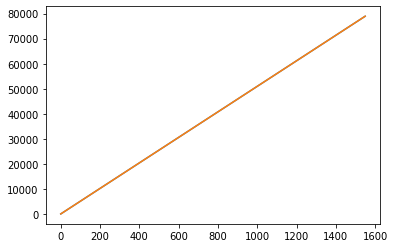

In [23]:
import matplotlib.pyplot as plt

# There was a discontinuity because of a past, longer recording session
# Plot of all frame timestamps

plt.plot(intFrameTimes[:17805])
plt.plot(mainFrameTimes[:17805])

In [24]:
# Check each interframe length

intFrameLengths = np.diff(intFrameTimes)
mainFrameLengths = np.diff(mainFrameTimes)

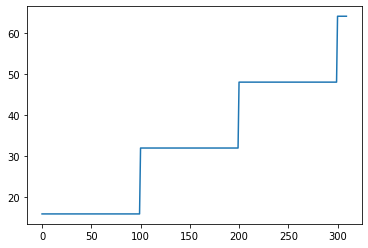

In [25]:
plt.plot(EWLVoltage[:310])

(array([   0., 1549.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
 array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250]),
 <a list of 9 Patch objects>)

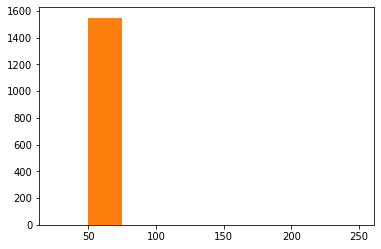

In [26]:
# Histogram of interframe lengths


#plt.hist(frameLengths, bins='auto')
# plt.hist(frameLengths, bins=[-3400, -3000, -2600, -2200, -1800, -1400, -1000, -600, -200, 200, 600, 1000])
plt.hist(intFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
plt.hist(mainFrameLengths, bins=[25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

# plt.hist(frameLengths, bins=[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


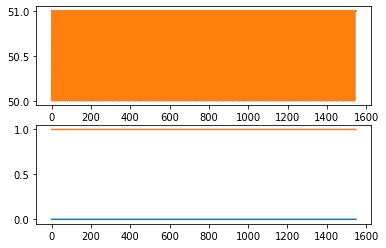

In [27]:
# figure = plt.subplots()

# Plot of all framelengths
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs)

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths)

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs)

# Zoom into where short/long interframe lengths are
# plt.subplot(4, 1, 3)
# plt.plot(frameLengths[45:105])

# plt.subplot(4, 1, 4)
# plt.plot(waitingFrames[45:105])

# figure.tight_layout()
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


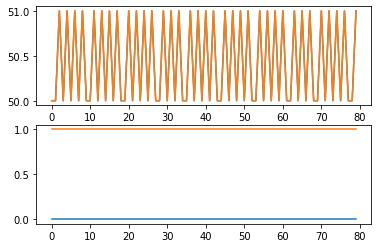

In [32]:
# Zoom into where short/long interframe lengths are
plt.subplot(2, 1, 1)
plt.plot(intFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(intFullBuffs[0:80])

plt.subplot(2, 1, 1)
plt.plot(mainFrameLengths[0:80])

plt.subplot(2, 1, 2)
plt.plot(mainFullBuffs[0:80])

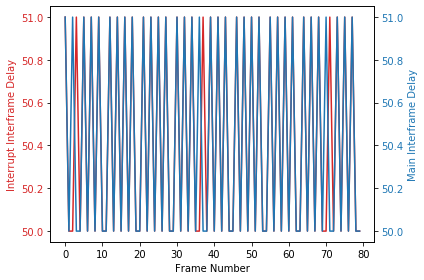

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Frame Number')
ax1.set_ylabel('Interrupt Interframe Delay', color=color)
ax1.plot(intFrameLengths[0:80], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Main Interframe Delay', color=color)  # we already handled the x-label with ax1
ax2.plot(mainFrameLengths[0:80], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [10]:
print(mainFrameLengths[-20:], "\n", sorted(intFrameLengths)[-10:])

[51 50 51 50 51 50 51 50 50 51 50 51 50 51 50 51 50 50 51 50] 
 [101, 101, 101, 101, 101, 101, 151, 151, 151, 152]


In [17]:
# Check if other interrupts are working fine


print(len(frameList), max(np.diff(frameList)), min(np.diff(frameList)), frameList.count(0), frameList.index(0))
print(len(frameLines), max(frameLines), min(frameLines))
print(len(frameDMA), max(frameDMA), min(frameDMA))

17805 1 1 1 0
17805 296 296
17805 1 1


In [18]:
# Where are the wrong interframe time lengths?

frameTimeDict = {i + 1: frameLengths[i] for i in range(len(frameLengths))} 

longFrameDict = {k: v for k, v in frameTimeDict.items() if (v >51)}
shortFrameDict = {k: v for k, v in frameTimeDict.items() if (v < 50)}
print(sorted(frameLengths))
print(shortFrameDict, longFrameDict, len(longFrameDict) + len(shortFrameDict))

NameError: name 'frameLengths' is not defined

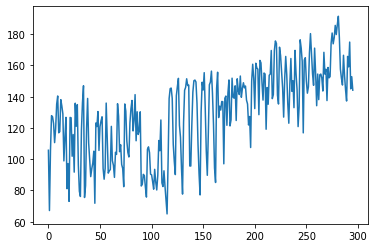

In [23]:
#Begin looking at each frame

frameRowMean = np.mean(frameArray[51], axis=1)
plt.plot(frameRowMean)

In [89]:
# I could do either minimum row or maximum-difference-from-adjacent row and track them through frames.
# Throw out the outliers?
numPlots = 3
darkRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    rowMeanDict = {i : frameRowMean[i] for i in range(0, len(frameRowMean))} # a dictionary with row:mean
    threeDarkRows = sorted(rowMeanDict, key=rowMeanDict.get, reverse=False)[:numPlots] # sorted list of three darkest rows
    darkRowProg[i] = threeDarkRows
    
    
#    darkRowVal = {i : rowMeanDict[i] for i in threeDarkRows} # sorted dict of darkest rows/their vals
#    print(darkRowVal)

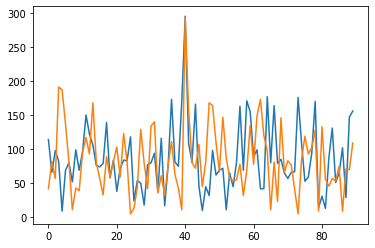

In [90]:
dark1Row = [i[0] for i in darkRowProg.values()]
dark2Row = [i[1] for i in darkRowProg.values()]
dark3Row = [i[2] for i in darkRowProg.values()]
plt.plot(list(darkRowProg.keys()), dark1Row)
plt.plot(list(darkRowProg.keys()), dark2Row)
# plt.plot(list(darkRowProg.keys()), dark3Row)
plt.show()

In [91]:
# Let's try maximum-difference
numPlots = 3
dipRowProg = {}
for i in range(numFrame + 1):
    frameRowMean = np.mean(frameArray[i],axis=1) # a list of each row's mean pixel value
    dipRowMean = np.diff(frameRowMean)
    rowDipDict = {i : dipRowMean[i] for i in range(0, len(dipRowMean))}
    threeDipRows = sorted(rowDipDict, key=rowDipDict.get, reverse=False)[:numPlots] # sorted list of three largest dips
    dipRowProg[i] = threeDipRows

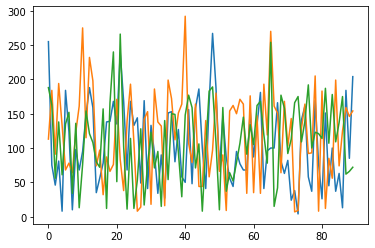

In [92]:
deep1Row = [i[0] for i in dipRowProg.values()]
deep2Row = [i[1] for i in dipRowProg.values()]
deep3Row = [i[2] for i in dipRowProg.values()]
plt.plot(list(darkRowProg.keys()), deep1Row)
plt.plot(list(darkRowProg.keys()), deep2Row)
plt.plot(list(darkRowProg.keys()), deep3Row)
plt.show()